<a href="https://colab.research.google.com/github/Suraj-7077/Airbnb-booking-analysis-EDA/blob/main/SURAJ_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - EDA

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **what is Airbnb **
##-> Airbnb is an american company which operates online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.

## Mounting google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/ Capstone project/ Airbnb NYC 2019.csv"

#some important datasets from drive

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

i.e we can clearly see this Airbnb csv file contains 48895 observation(rows) and 16 columns 

In [ ]:
df.head()          ### which prints top 5 rows from DataFrame df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns              ### It returns columns name in datframe

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# The Data--- Tools discription.



1.  **id** =  Means (room_id), It is a A unique number identifying an AirBnB listing. 
2.**name** = Suggest the name of listings.
3.**host id** = A unique number identifying an AirBnB host(i.e owner name)
4. **host name** = suggest the owners name.
5. **neighbourhood group** = It suggest the place or city of living.
6. **neighbourhood** =  Its the sorrounding area of that perticular city.
7. **longitude** and **latitude** = Gives the loaction of coresponding listings on Airbnb datset.
8. **room type** = It suggest as One of the types of rooms - Entire home/apt, Private room, Shared room
9. **price** = Shows the price (in USD) for a night stay.
10. **minimum nights** = Shwos that person or guest number of nights stayed.
11. **number of reviews** , **last review** & **reviews/month** = Tells about the response of peoples to that listings.
12. **Calculated host listing counts** = Shows total number of listings in that perticular neighbourhood group & neighbourhood.
13. **availability 365** = Means overall availability of rooms. 



# **Some Quentions to explore from given dataset**

# Qn-1 What can we learn about different hosts and areas?

In [ ]:
host_areas = df.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(100)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
...,...,...,...
2442,Chadanut,Brooklyn,11
3944,Eliahu,Manhattan,11
9663,Melly,Brooklyn,11
3945,Eliahu,Queens,11


 -----> As we can see that host name **Sonder(NYC)** in area** Manhattan** has the highest listings(places to stay).
 And then followed by host name **Blueground** in area** Manhatten** and **Brooklyn** has highest listings.

# Qn-2 What can we learn from predictions? (ex: locations(area), prices, reviews, etc)

In [ ]:
area = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().head(10)

In [ ]:
area

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


1) Now ploting graph of locations (area) v/s number of reviews

In [ ]:
figure = plt.Figure(figsize=(10,5))

Text(0.5, 1.0, 'location(area) v/s number of reviews')

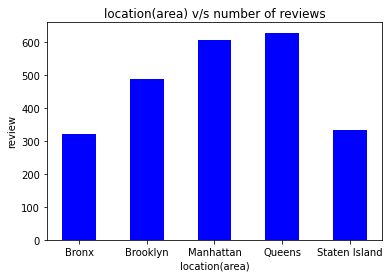

In [ ]:
location = area['neighbourhood_group']
review = area['number_of_reviews']

## creating a bar chart 
plt.bar(location, review, color ='blue', width = 0.5)
plt.ylabel('review')
plt.xlabel('location(area)')
plt.title('location(area) v/s number of reviews')

2) Now ploting graph of prices v/s number of reviews

In [ ]:
prices_reviews = df.groupby([ 'price'])['number_of_reviews'].max().reset_index().head(10)
prices_reviews

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


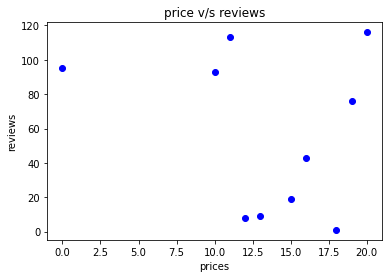

In [ ]:
figure = plt.Figure(figsize=(10,5))
prices = prices_reviews['price']
reviews =prices_reviews['number_of_reviews']

plt.scatter(prices,reviews,color='blue')
plt.ylabel('reviews')
plt.xlabel('prices')
plt.title('price v/s reviews' )
plt.show()

As we see from above scattered graph tells that for room price 0 has 95 number of reviews, which seems to be strange bcoz no room type has 0 price i.e 0 NAN.

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Qn-3 Which hosts are the busiest and why?

In [ ]:
busy_hosts = df.groupby(['host_id','host_name'])['number_of_reviews'].max().reset_index()
busy_hosts.sort_values(by = 'number_of_reviews',ascending = False).head(10)

,host_id,host_name,number_of_reviews
23486,47621202,Dona,629
7362,4734398,Jj,607
21304,37312959,Maya,543
4367,2369681,Carol,540
18626,26432133,Danielle,510
13109,12949460,Asa,488
1864,792159,Wanda,480
4818,2680820,Linda,474
147,42273,Dani,467
17517,23591164,Angela,466


From above data we see that host name Dona has the most number of reviews(629) 
i.e busiest host is Dona

# Qn - 4 Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


Text(0.5, 1.0, 'Traffic Areas')

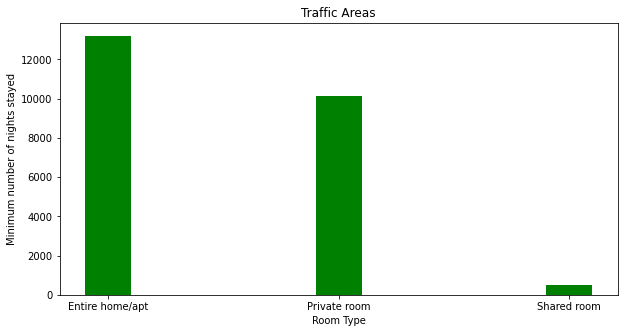

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='green',
        width = 0.2)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")

As we can see that most of people prefer Entire home/apt to stay or to live, And thats  why In manhatten most of the listings are entire homes and people stayed there almost 13199 nights i.e approx 36 years they prefer to live and thats why in Manhatten has most traffic place. and then private room also have demand in market bcoz most of people prefers privacy over sharing of rooms. 

# Qn-5 which hosts has the highest number of listings count in NYC ?

In [ ]:
hosts_highest_listings = df['host_name'].value_counts().head(10)                  ### returns top 10 hosts which has highest listings in enire NYC

In [ ]:
hosts_highest_listings

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC')

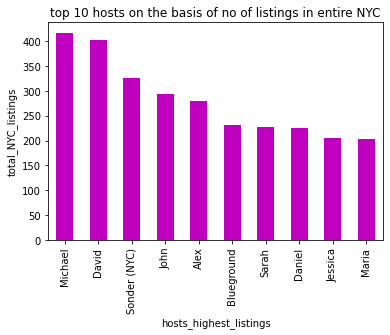

In [ ]:
hosts_highest_listings.plot(kind='bar',color='m')
plt.xlabel('hosts_highest_listings' )
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC')

------>> Thus above graph shows  host name- **Michael** has the highest number of listings in whole NYC. & then host name- **David** has second highest listings.

# Qn-6 Lets check what are the prices for different room types in diffferent  neighbourhood groups(areas) ?

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

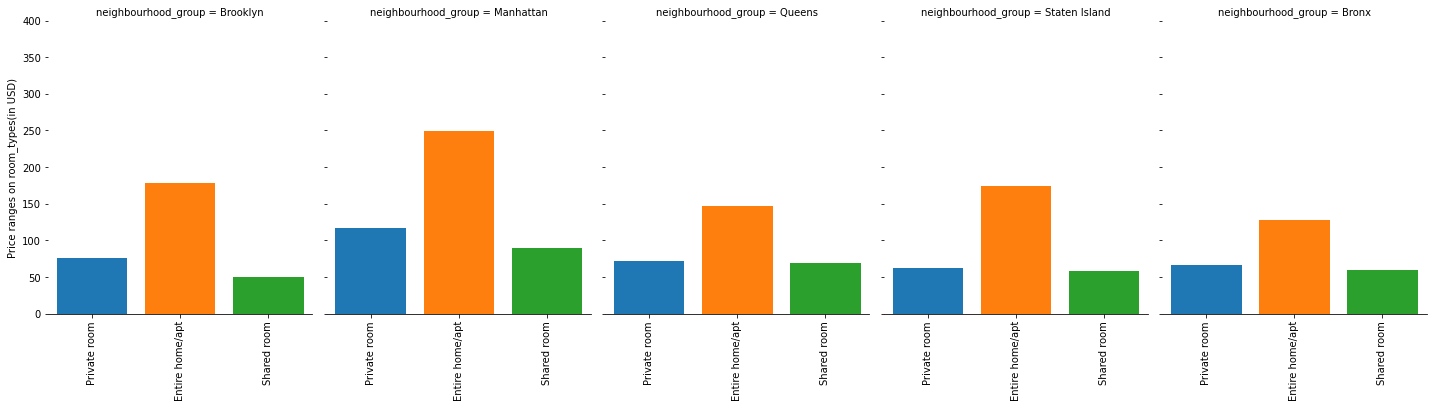

In [ ]:
price_room_type = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=1,
                kind="bar",ci=None,  aspect=0.8)
price_room_type.set_axis_labels("", "Price ranges on room_types(in USD)")
price_room_type.set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
price_room_type.set(ylim=(0, 400))
price_room_type.despine(left=True) 

---->>>**Manhattan** area  has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night.
From this we can state that manhatten areas is costliest area to live.

# QN-7 What is the average number of nights people stayed in each type of rooms?

Text(0, 0.5, 'Minimum night Stays')

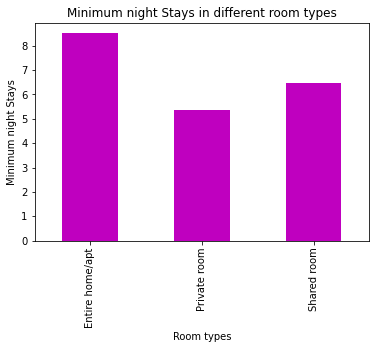

In [ ]:
df.groupby(['room_type'])['minimum_nights'].mean().plot(kind='bar', color= 'm')
plt.title('Minimum night Stays in different room types')
plt.xlabel('Room types')
plt.ylabel('Minimum night Stays')

---->>> Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of more than 8 nights followed by guests who stayed in **shared room** where average stay is 6-7 nights.

# Qn- 8 what are the top 20 most reviewed listings(Rooms) in entire NYC

In [ ]:
most_reviewed_listings= df.nlargest(20,'reviews_per_month')
most_reviewed_listings[['name','reviews_per_month','neighbourhood_group','host_name']]

,name,reviews_per_month,neighbourhood_group,host_name
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan,Row NYC
42076,Great Room in the heart of Times Square!,27.95,Manhattan,Row NYC
38870,Lou's Palace-So much for so little,20.94,Queens,Louann
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens,Nalicia
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens,Nalicia
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens,Nalicia
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens,Danielle
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens,Danielle
36238,“For Heaven Cakes”,15.78,Queens,Brent
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens,Lakshmee


----->>> So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with **58 reviews/month** followed by **Great Room in the heart of Times Square!** with a total of **27 reviews/month**. 
Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.



# Qn- 9 Which hosts have the average most reviews per monthon airbnb?

In [ ]:
hosts_name_reviews_per_month= most_reviewed_listings.groupby(['host_name'])['reviews_per_month'].mean()
hosts_name_reviews_per_month.sort_values()

host_name
Aisling     13.420000
Yvonne      13.480000
Dona        13.990000
Alina       14.000000
Sam         14.000000
Danielle    15.015000
Lakshmee    15.275000
Brent       15.780000
Nalicia     18.126667
Louann      20.940000
Row NYC     33.690000
Name: reviews_per_month, dtype: float64

Now ploting graph of **host name v/s reviews per month**

Text(0.5, 1.0, 'Top Reviews/month received by hosts')

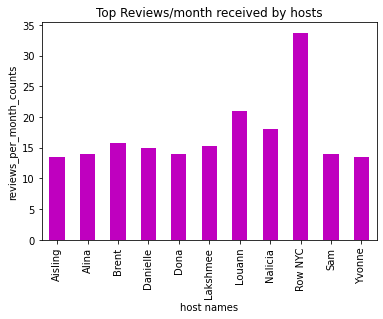

In [ ]:
hosts_name_reviews_per_month.plot(x='host_name', y='reviews_per_month',kind='bar',color='m')
plt.ylabel('reviews_per_month_counts')
plt.xlabel('host names')
plt.title('Top Reviews/month received by hosts')


---->>>**Row NYC** has as the most reviewed host with more than 33 reviews/month on average.



# Qn- 10 Finding location of neighbourhood groups by using latitude and longitude.

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Location of neighbourhood groups')

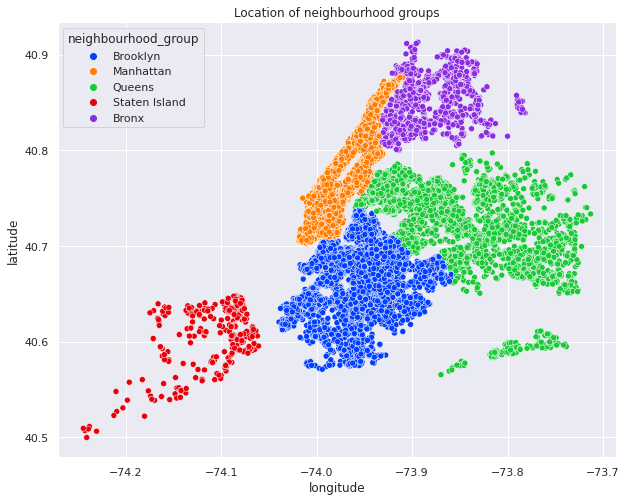

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})               ## using rc parameter to resize figure shape 
location_neighbourhood_groups= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')  
location_neighbourhood_groups.set_title('Location of neighbourhood groups')


---->>>Here units of longitude and latitude are given in degrees (°). There are **360° of longitude (180° E ↔ 180° W**) and **180° of latitude (90° N ↔ 90° S)**.
Negative longitudes represent the western hemisphere

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Qn- 11 Now checking which listings in neighbourhood group expensive & cheapest with respect to prices in entire NYC ?

1) For Expenxive listings---->>>

In [ ]:
df.nlargest(5, 'price')[['name','neighbourhood_group','neighbourhood','room_type','price']]

,name,neighbourhood_group,neighbourhood,room_type,price
9151,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999


From the Above Table we see that **Manhattan** is most expenxive place to live and it has entire home/apt room type.

2) For Cheapest listings ---->>>

In [ ]:
df.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,room_type,price
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Private room,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Private room,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Private room,0
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Private room,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,Private room,0


From above table we see that **Bronx** is the cheapest place to live and then followed by **Brooklyn** and both of these have private room type.

# Qn- 12 Now checking availability of listings(Rooms) in different neighbourhood group ?

Text(0.5, 1.0, 'neighbourhood group listings vs avalability per year')

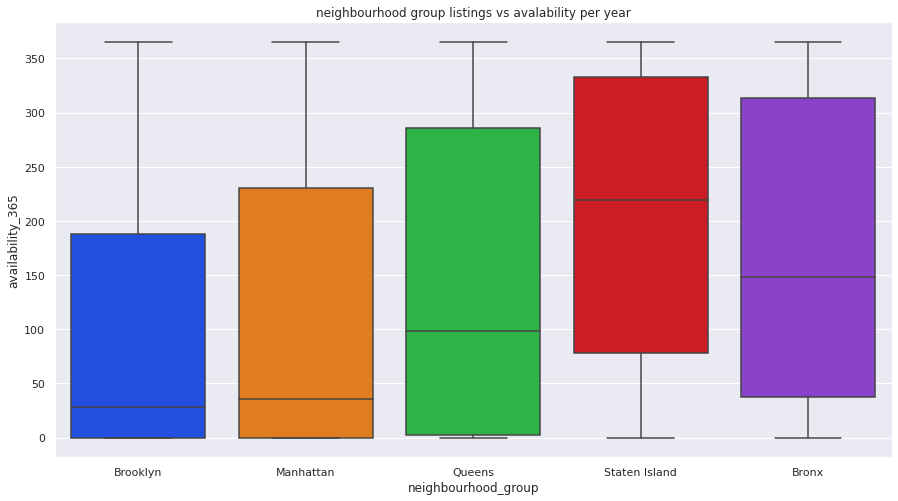

In [ ]:
plt.subplots(figsize=(15,8))
sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title('neighbourhood group listings vs avalability per year')

1. Looking at the above **categorical box** plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days. On an average of Staten Island listings are available to around 210 days every year. 
2. And then followed by average of **Bronx** listings are available for 150 days.
3. We know that **Brooklyn** is cheapest place to stay and thats why most of the peoples tries to go there & thats why Brooklyn has least avalability of rooms. 

## Qn- 13 What is the average price of each neighbourhood groups ?

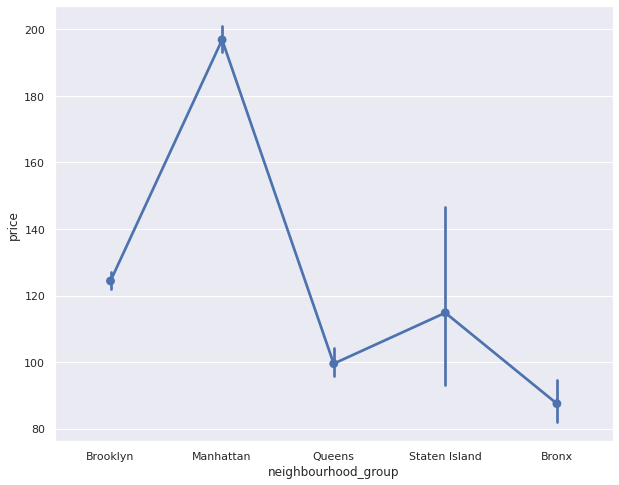

In [ ]:
sns.pointplot(x ='neighbourhood_group', y='price', data=df,estimator=np.mean)

---->>>Thus above graph conclude that avg price(in USD) for most Costliest place Manhatten is almost 200$. 
Cheapest place Bronx avg price is 90 USD.
 

#Qn- 14 Check how the distribution of prices takes place in given Airbnb dataset ? 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


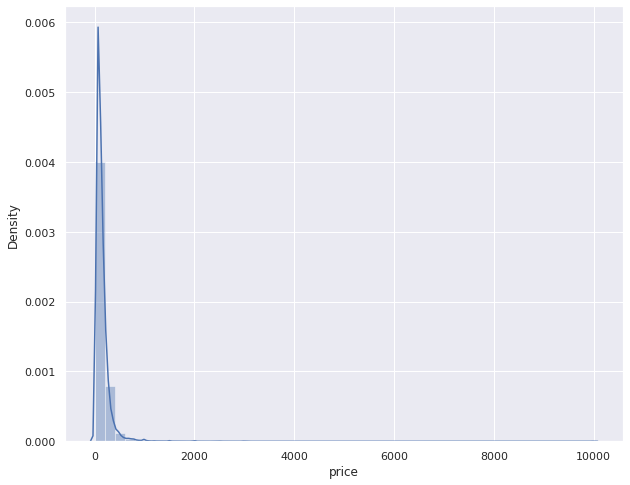

In [ ]:
sns.distplot(df['price'], hist=True)

---->>> As we can see that the ditribution is quite like uniform normal distribution. and from this distribution we can say that most of the listings prices are in under the range of 2000 USD.And we have observed in Qn-12 the avg price of each place.

# Qn- 15 Checking how are the variuos features(i.e here Columns) interrelated with each other ?

--->>> Here we use Correlation matrix to get relationship betweeen two items.

In [ ]:
df.columns                      ### Columns name 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

We only get those columns in correlation matrix whoose Data type is Int & Float, not for object Data type.

In [ ]:
corr_df = df.corr()
corr_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


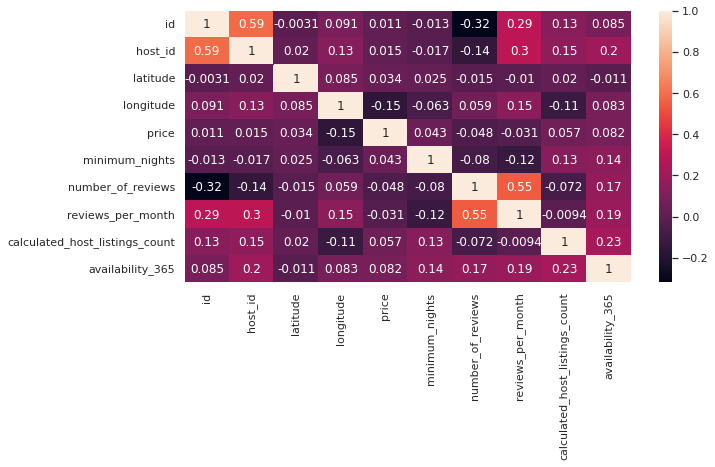

In [ ]:
plt.figure(figsize= (10,5))
sns.heatmap(corr_df,annot = True)

In [ ]:
corr_df.head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


---->>> From correlation matrix Heatmap, we can see that diagonal items have the highest positive correlation which shows there are some relation between them.
And also we note that 
1) light colour shows- Positive Correlation
2) dark colour shows - Negative Correlation 

 This Notebook created By Suraj Galande.